# Project Day 3
### Today is all about statistical analysis and visualization using libraries 

We begin by importing our dataframe

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/becharah/GESISPython/main/Project/Climate_twitter.csv"
data = pd.read_csv(url)

In [8]:
# Display the first 5 rows of the data

data.head()

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,@Elsevier and the @EditorsinChief are pleased ...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH #cl...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000


In [11]:
# Get the average number of retweets using pandas 

# using pandas
data.retweets.mean()

# now using numpy
import numpy as np
np.mean(data.retweets)

# now using statistics
import statistics
statistics.mean(data.retweets)

2.6666666666666665

In [13]:
# We should probably try to interpret this. Get the medium and mode using the statistics library
# save the values as median_retweet and mode_retweet

median_retweet = statistics.median(data['retweets'])
mode_retweet = statistics.mode(data['retweets'])

# Try the same with the maximum and minimun values
max_retweet = max(data['retweets'])
min_retweet = min(data['retweets'])

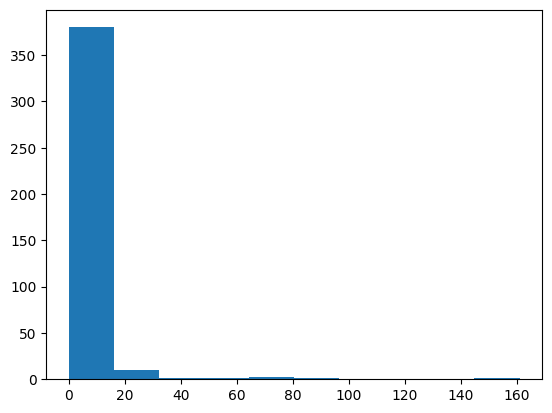

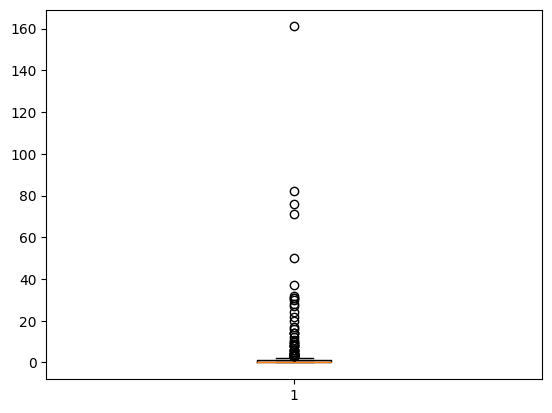

In [5]:
# We can use the describe method to get a summary of the data column 
data['retweets'].describe()

# what is the typical way to visualize the distribution of numirical data?
# We can use a histogram to visualize the distribution of the retweets
import matplotlib.pyplot as plt
plt.hist(data['retweets'], bins=10)
plt.show()

# Try the same with a boxplot
plt.boxplot(data['retweets'])
plt.show()

# Which one do you think is more informative?


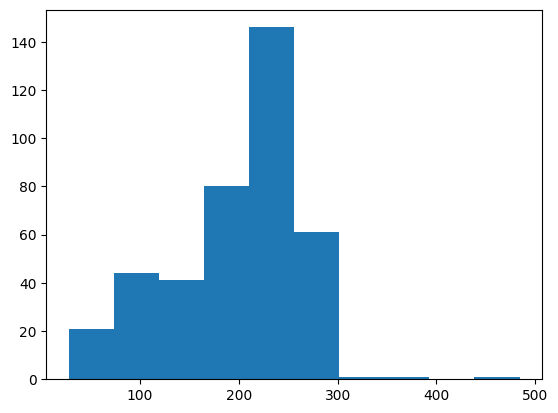

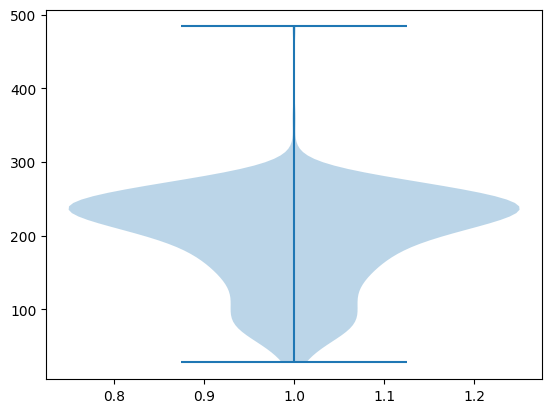

In [11]:
# Now get the average len of the tweets in our data using apply method
import statistics

len_average = data['text'].apply(lambda x: len(x))    

statistics.mean(len_average)

# visualize the distribution of the length of the tweets
plt.hist(len_average, bins=10)
plt.show()

# now use a violin plot
plt.violinplot(len_average)
plt.show()

In [16]:
# We want to compare our individual tweet to the average. Did this tweet get more or less likes than the average tweet?

mean_likes = data.likes.mean()

# Use the apply method to create a new column called likes_vs_mean
data['likes_vs_mean'] = data.likes.apply(lambda x: 'higher' if x > mean_likes else 'lower')

In [ ]:
# Repeat for average length of text of tweets 
mean_len = statistics.mean(len_average)
data['len_vs_mean'] = len_average.apply(lambda x: 'higher' if x > mean_len else 'lower')


In [ ]:
# count the number of tweets that have more likes than the average
data['likes_vs_mean'].value_counts()

# count the number of tweets that have more text than the average
data['len_vs_mean'].value_counts()

In [17]:
# Let's move on to analyse the content of the tweets. 

# Let's make a list of words to count that are relevant to climate change
more_words = ['warming', 'fossile fuels', 'emissions']

# count the number of tweets that contain each words in the list above
data['warming'] = data.text.apply(lambda x: 1 if 'warming' in x else 0)
data['fossile_fuels'] = data.text.apply(lambda x: 1 if 'fossile fuels' in x else 0)
data['emissions'] = data.text.apply(lambda x: 1 if 'emissions' in x else 0)

In [21]:
# we can add a column that sums the number of words in the list above
data['warming'].sum()
data['fossile_fuels'].sum()
data['emissions'].sum()

# which word is the most common in the tweets?
data[['warming', 'fossile_fuels', 'emissions']].sum().idxmax()

'warming'

In [45]:
# For data science purposes, we don't like boolean, we like 0 and 1

# Change the values of a column
data['verified'] = data['verified'].replace({True: 1, False: 0})

# What happened there?
data

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,0,23415,20439,-0.054365,0.426984
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,@Elsevier and the @EditorsinChief are pleased ...,ElsevierEnergy,"Oxford, England",0,6615,508,0.387500,0.633333
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,0,22,133,0.261905,0.345238
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",0,4191,3708,0.000000,0.000000
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH #cl...,EDITORatWORK,"Rural Hall, North Carolina, USA",0,4191,3708,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,54992908,2020-01-03 12:29:11,0,Twitter Web App,Sascha Becher,0,An Inconsistent Truth From global cooling 1970...,SaschaBecher,Deutschland,0,132,132,0.000000,0.000000
392,209636315,2020-01-02 08:38:37,0,Twitter for iPhone,Morgan Fitzgibbon,0,2 climate thought alongside Einstein Robert Op...,morganefitz,"Cork, Ireland",0,286,156,0.194444,0.494444
393,209636315,2020-01-02 08:35:52,0,Twitter for iPhone,Morgan Fitzgibbon,0,3 climate used as supporting evidence that man...,morganefitz,"Cork, Ireland",0,286,156,0.286667,0.466667
394,21769361,2020-01-02 03:47:08,0,Twitter for iPhone,STEⓋE BOZIC,0,Global warming Global government via YouTube c...,STEVE_BOZIC,"ÜT: 43.863963,-79.749634",0,478,738,0.000000,0.000000


In [76]:
# Go ahead and complete this list of to-do tasks for the data 

# 1. Create a subset of the data for the verified users. Call it vf_data
vf_data = data[data['verified']==1]

# 2. Check the number of rows and columns of vf_data
vf_data.shape

# 3. Check the number of missing values in vf_data
vf_data.isnull().sum()

# 4. Get the average number of followers of the verified users. Now do the same for unverified users.
#    Which is bigger?
np.mean(vf_data ['followers'])

#Two steps
nv_data = data[data['verified']==0]
np.mean(nv_data['followers'])

# One step
np.mean(data[data['verified']==0]['followers'])

3650.674666666667

In [79]:
# Can we do this in one line of code? 
data.groupby('verified')['followers'].mean()


verified
0      3650.674667
1    151146.809524
Name: followers, dtype: float64

In [81]:
# Try it now with another variable and check retweets
data.groupby('source')['retweets'].mean()


# We see a big outlier!
data.groupby('source')['retweets'].mean().sort_values(ascending=False)

source
Granite Media                       161.000000
Twitter for Advertisers              14.000000
Twitter Web Client                    3.695652
Twitter Web App                       3.681818
TweetDeck                             2.200000
Twitter for iPhone                    1.969697
Hootsuite Inc.                        1.440000
Twitter for iPad                      1.181818
Buffer                                1.000000
Facebook                              1.000000
Twitter for Android                   0.420000
Spreaker                              0.200000
Prothom Alo English                   0.000000
Tumblr                                0.000000
Blog2Social APP                       0.000000
News Users                            0.000000
Twitter for Advertisers (legacy)      0.000000
Twittimer                             0.000000
WordPress.com                         0.000000
PromotePictures                       0.000000
MonkeyViral Auto Post                 0.000000
MrPyro

In [83]:
# Who is Granite media? Subset

data[data['source'] == 'Granite Media']

# What did they write?
data[data['source'] == 'Granite Media']['text']

106    Yes thats right Every single country
Name: text, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

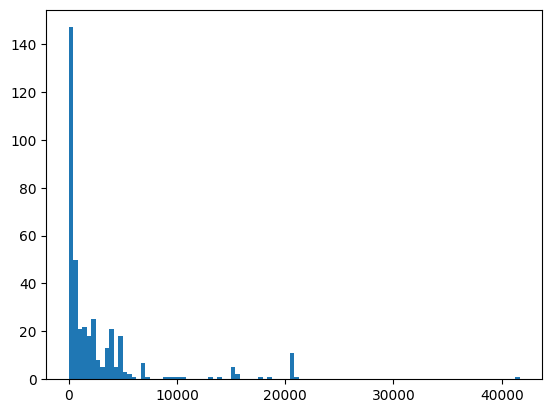

In [12]:
# Let's visualize our data further. We will use matplotlib
import matplotlib.pyplot as plt

# Let's plot the number of followers
plt.hist(data['friends'], bins=100)
plt.show


NameError: name 'vf_data' is not defined

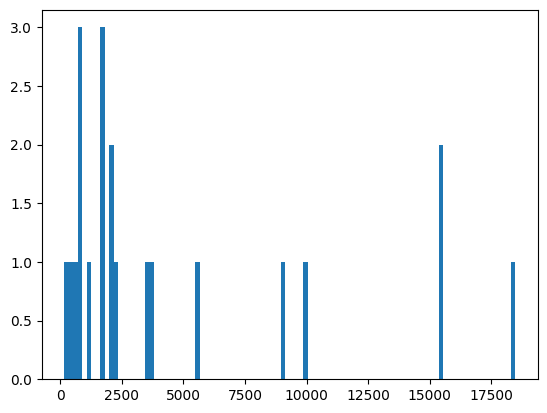

In [13]:
# Let's plot the number of followers for verified users

plt.hist(data[data['verified'] == 1]['friends'], bins=100)

plt.hist(vf_data['friends'], bins=100)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

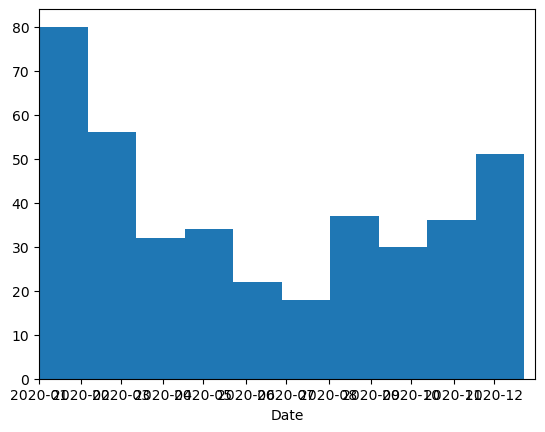

In [89]:
# If groups you will now do the following exercise

#data = pd.read_csv(url, parse_dates=['date'])
plt.hist(data['date'], bins=100)
plt.show

# Plot the date of the tweets
data = pd.read_csv(url, parse_dates=['date'])
plt.hist(data['date'])
# limit the x axis to months in 2020
plt.xlim(pd.Timestamp('2020-01-01'), pd.Timestamp('2020-12-31'))
# Clean label
plt.xlabel('Date')
plt.show


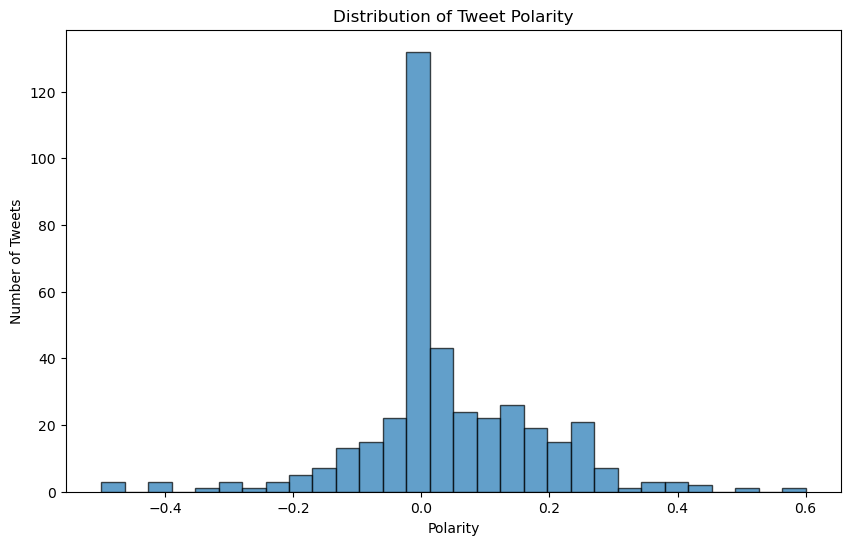

<AxesSubplot:>

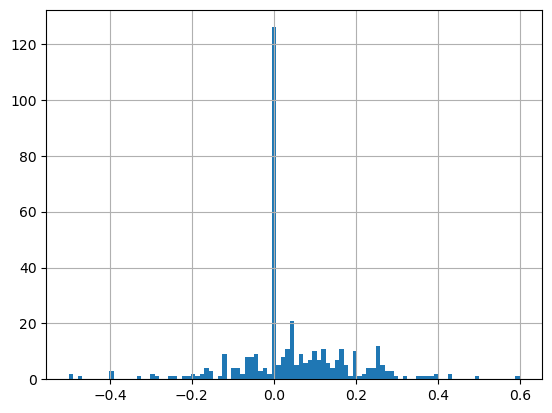

In [91]:
#Plot polarity of the tweets
plt.figure(figsize=(10, 6))
plt.hist(data['polarity'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Tweet Polarity')
plt.xlabel('Polarity')
plt.ylabel('Number of Tweets')
plt.show()

#
data['polarity'].hist(bins=100)

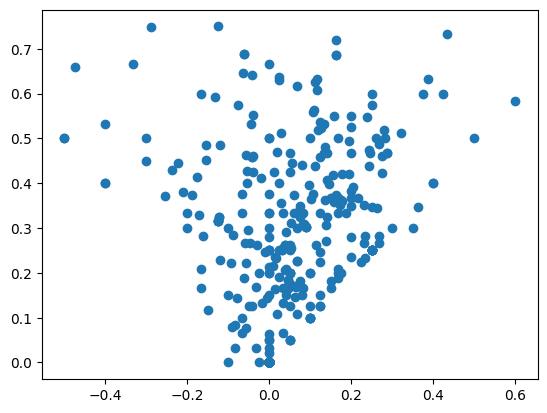

In [23]:
# Create a scatterplot of polarity and subjectivity

import matplotlib.pyplot as plt
plt.scatter(data['polarity'], data['subjectivity'])

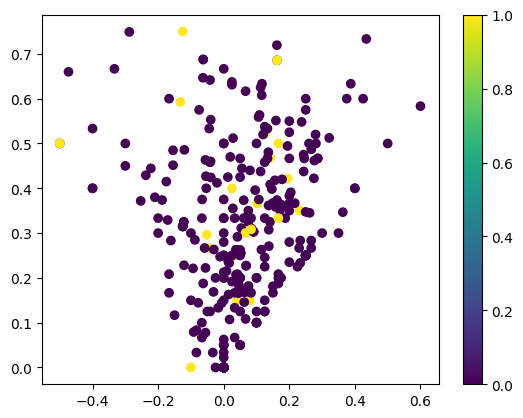

In [24]:
# We can improve this plot by adding color to the points
plt.scatter(data['polarity'], data['subjectivity'], c=data['verified'])
plt.colorbar()


Text(0, 0.5, 'Subjectivity')

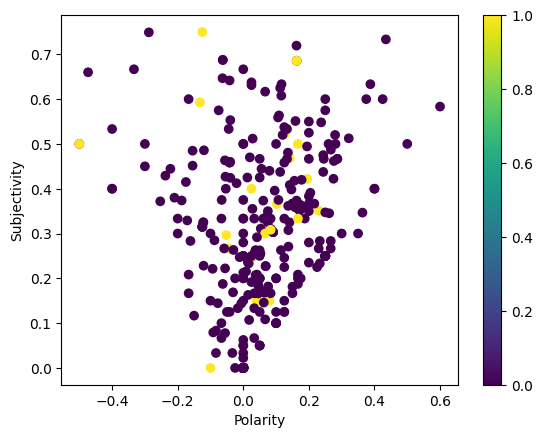

In [25]:
# we can also add names to the y and x axis
plt.scatter(data['polarity'], data['subjectivity'], c=data['verified'])
plt.colorbar()
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')


In [ ]:
# Now it's your turn create three visualizations of your choice using the data we have.

In [14]:
# Save them as png files and use them on your paper!
# we will continue tomorrow with the last stage of our project